In [53]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import acf
from statsmodels.graphics.tsaplots import pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tools import add_constant
from statsmodels.tools.eval_measures import mse
from statsmodels.regression.linear_model import OLS
import matplotlib.pyplot as plt
import seaborn as sns
from dm_test import dm_test
import scipy
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)
%matplotlib notebook

In [54]:
qtly = pd.read_excel("quarterly.xls")

# 1.  Consider the variable Currency (Curr) on the data set QUARTERLY.XLS. 

### a. First-difference the log of $curr_t$ and obtain the ACF and PACF of the resultant series. Does the seasonal pattern best reflect an AR, MA, or a mixed pattern? 

In [55]:
qtly['lncurr'] = np.log(qtly['Curr'])
qtly['dlncurr'] = qtly['lncurr'].diff()

In [56]:
acf_nums = acf(qtly['dlncurr'][1:])
print("ACF: ")
for x in range(10):
    print('\u03C1{}: {}'.format(get_sub(str(x+1)), acf_nums[x+1]))

ACF: 
ρ₁: 0.14882914824458313
ρ₂: -0.13161475796686506
ρ₃: -0.00430248410646443
ρ₄: 0.5572370268711841
ρ₅: -0.07592817609208603
ρ₆: -0.2214824762576953
ρ₇: -0.022594777313694057
ρ₈: 0.5668221457128763
ρ₉: -0.01303088561266072
ρ₁₀: -0.1394154931026575


C:\Users\parik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\parik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [57]:
pacf_nums = pacf(qtly['dlncurr'][1:])
print("PACF: ")
for x in range(10):
    print('\u03C1{}: {}'.format(get_sub(str(x+1)), pacf_nums[x+1]))

PACF: 
ρ₁: 0.14953785847431927
ρ₂: -0.15878651643167582
ρ₃: 0.04449665796712774
ρ₄: 0.5677780255489346
ρ₅: -0.40151110175177673
ρ₆: -0.001322040267701232
ρ₇: 0.10270320779010385
ρ₈: 0.35307487922659486
ρ₉: -0.1171714747540693
ρ₁₀: 0.06351613909911355


C:\Users\parik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


<IPython.core.display.Javascript object>


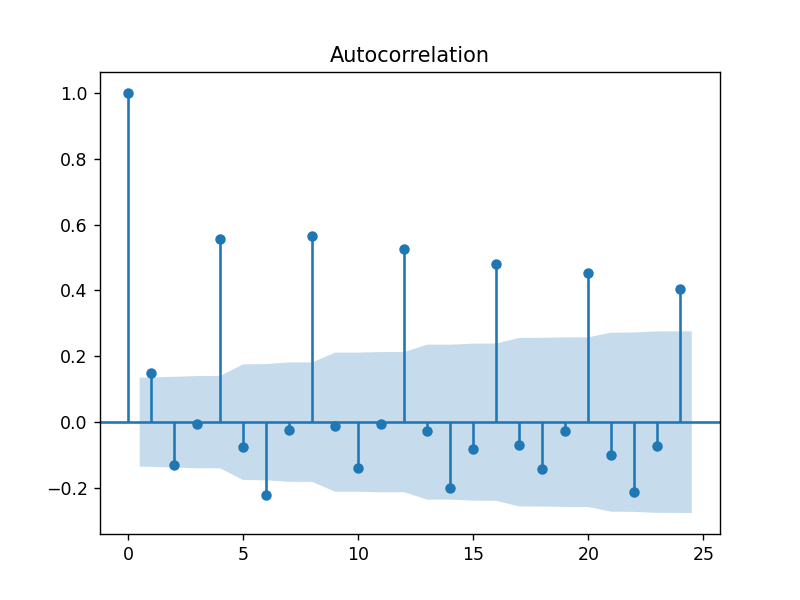

<IPython.core.display.Javascript object>


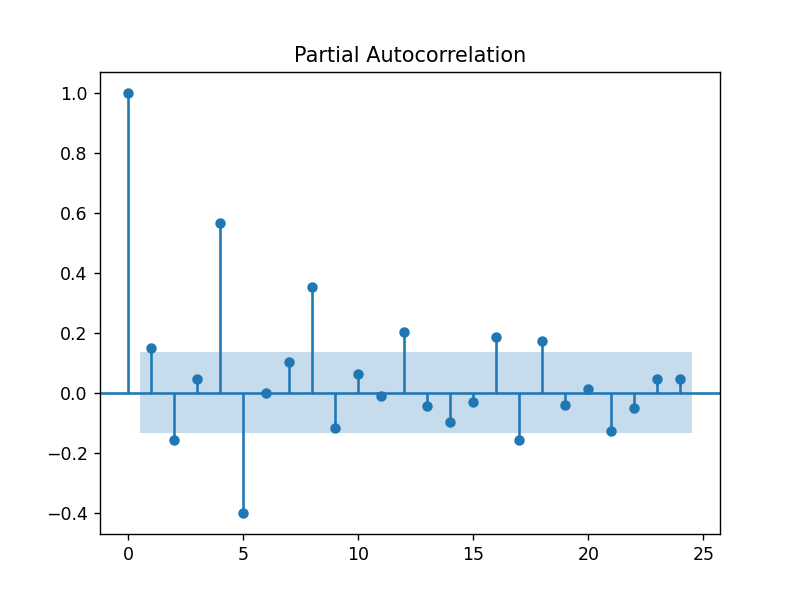

In [58]:
acf2 = plot_acf(qtly['dlncurr'][1:])
pacf2 = plot_pacf(qtly['dlncurr'][1:])

b. Now, obtain the ACF and PACF of the seasonal difference of the first difference. What is 
likely the pattern present in the ACF and PACF?

In [59]:
qtly['seasonal_diff'] = qtly['dlncurr'].diff(4)
endog = qtly['seasonal_diff'][5:]
endog

5      0.000802
6      0.006443
7      0.009286
8      0.008470
9      0.008163
         ...   
207   -0.003600
208    0.005790
209   -0.006734
210   -0.003154
211    0.004516
Name: seasonal_diff, Length: 207, dtype: float64

### Seasonal Difference

<IPython.core.display.Javascript object>


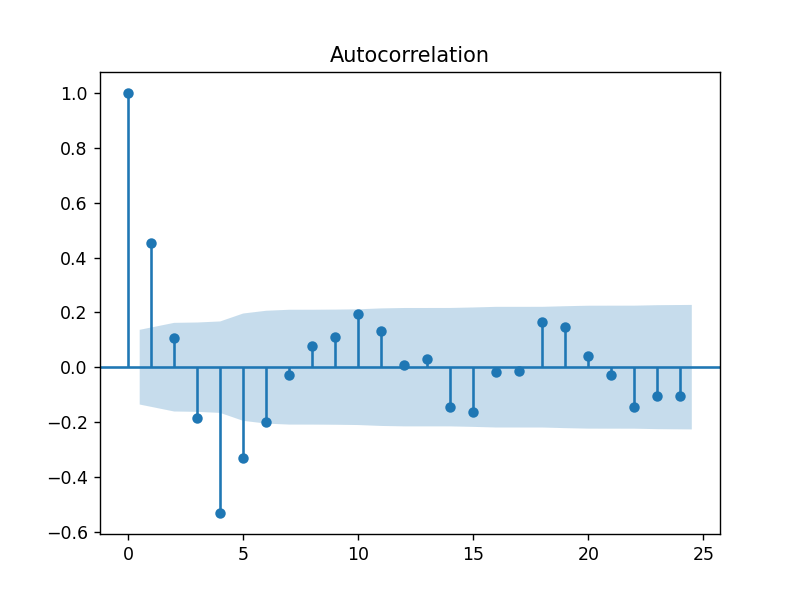

<IPython.core.display.Javascript object>


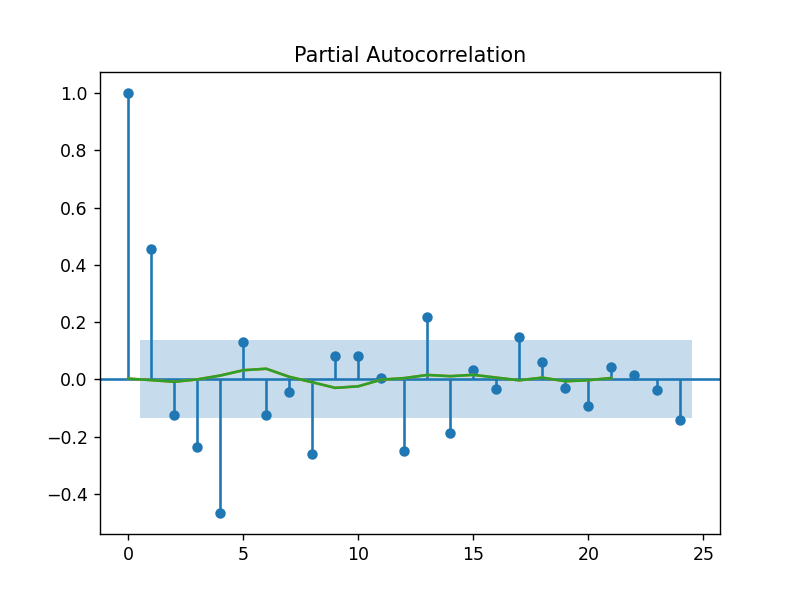

In [60]:
acf2 = plot_acf(endog)
pacf2 = plot_pacf(endog)

In [61]:
acf_nums2 = acf(endog)
print("ACF: ")
for x in range(10):
    print('\u03C1{}: {}'.format(get_sub(str(x+1)), acf_nums2[x+1]))

ACF: 
ρ₁: 0.4519666134511246
ρ₂: 0.10600045431802889
ρ₃: -0.1842629102900877
ρ₄: -0.5318711556528264
ρ₅: -0.3296684340808888
ρ₆: -0.20139667747493714
ρ₇: -0.02736920017569217
ρ₈: 0.07746562856347447
ρ₉: 0.10999534372019885
ρ₁₀: 0.1949006429882383


C:\Users\parik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\parik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [62]:
pacf_nums2 = pacf(endog)
print("PACF: ")
for x in range(10):
    print('\u03C1{}: {}'.format(get_sub(str(x+1)), pacf_nums2[x+1]))

PACF: 
ρ₁: 0.45416062613778035
ρ₂: -0.1250126030656793
ρ₃: -0.23662718115834058
ρ₄: -0.46698955596754066
ρ₅: 0.13096488863974018
ρ₆: -0.12394143657169109
ρ₇: -0.04506490440677342
ρ₈: -0.26232970834042474
ρ₉: 0.08185283581894327
ρ₁₀: 0.08312863655380834


C:\Users\parik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


### Which one has better in-sample fit ARIMA(0, 1, 1) or ARIMA(1,1,0)? Does the result consistent with out-of-sample fit as well?

In [63]:
endog = qtly['seasonal_diff'][1:].values
model = ARIMA(endog, order=(0,1,1))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  211
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 649.600
Date:                Sat, 26 Mar 2022   AIC                          -1295.200
Time:                        16:59:20   BIC                          -1288.505
Sample:                             0   HQIC                         -1292.493
                                - 211                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2318      0.037     -6.315      0.000      -0.304      -0.160
sigma2      9.885e-05   5.02e-06     19.705      0.000     8.9e-05       0.000
Ljung-Box (L1) (Q):                   0.13   Jarque-

In [64]:
endog = qtly['seasonal_diff'][1:].values
model = ARIMA(endog, order=(1,1,0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  211
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 648.874
Date:                Sat, 26 Mar 2022   AIC                          -1293.748
Time:                        16:59:20   BIC                          -1287.054
Sample:                             0   HQIC                         -1291.042
                                - 211                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1836      0.035     -5.322      0.000      -0.251      -0.116
sigma2      9.965e-05   5.09e-06     19.591      0.000    8.97e-05       0.000
Ljung-Box (L1) (Q):                   0.05   Jarque-

### Out of sample fit

In [65]:
train_size = int(len(endog)*0.90)
train = endog[:train_size]
test = endog[train_size:]
start_index = len(train)
end_index = len(endog)-1

In [67]:
test

array([ 0.0023558 , -0.0028418 , -0.0086587 , -0.00042865,  0.01313419,
        0.0316743 ,  0.03686585,  0.00874981, -0.01021104, -0.029933  ,
       -0.02455151, -0.00123985,  0.00407584,  0.01521785,  0.01085676,
        0.01557793,  0.00590228, -0.00360037,  0.00578969, -0.00673393,
       -0.00315449,  0.00451623])

In [68]:
model = ARIMA(endog, order=(0,1,1))
res = model.fit()
ar_13 = res.params[-1]
forecast = res.predict(start=start_index, end=end_index)
r2 = mse(test, forecast)
mse1 = r2
print("MSE of out sample ARIMA(011): ",r2)
print("AIC of in sample ARIMA(011):  ",res.aic)

MSE of out sample ARIMA(011):  0.00019104041551375948
AIC of in sample ARIMA(011):   -1295.1996050206558


In [74]:
model = ARIMA(endog, order=(1,1,0))
res = model.fit()
ar_13 = res.params[-1]
forecast = res.predict(start=start_index, end=end_index)
r2 = mse(test, forecast)
mse2 = r2
print("MSE of out sample ARIMA(110): {0:.6f}".format(r2))
print("AIC of in sample ARIMA(110):  ",res.aic)

MSE of out sample ARIMA(110): 0.000185
AIC of in sample ARIMA(110):   -1293.7478462849242


In [ ]:
mse1<mse2

### 2.  The file QUARTERLY.XLS contains U.S. interest rate data from 1960Q1 to 2012Q4. Form the spread by subtracting the T-bill rate from the 5-year rate.

Use the full sample period to obtain estimates of the AR(7) and the ARMA(1, 1) model and 
report the results of coefficients along with their standard errors, t-statistics with respective 
probability values, and Lung-Box Q-statistics of the residuals with lags 8, 16 & 24 .

In [76]:
qtly['spread'] = qtly['r5']- qtly['Tbill']

In [77]:
qtly['spread'].plot()

<AxesSubplot:>

In [78]:
endog = qtly['spread']
model = ARIMA(endog, order=(1,1,0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 spread   No. Observations:                  212
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -155.032
Date:                Sat, 26 Mar 2022   AIC                            314.065
Time:                        17:16:17   BIC                            320.768
Sample:                             0   HQIC                           316.774
                                - 212                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1304      0.047      2.749      0.006       0.037       0.223
sigma2         0.2545      0.013     18.907      0.000       0.228       0.281
Ljung-Box (L1) (Q):                   0.14   Jarque-

In [36]:
sm.stats.acorr_ljungbox(res.resid, lags=np.array([8,16,24]), return_df=True)

,lb_stat,lb_pvalue
8,26.362377,0.000910
16,38.380465,0.001335
24,46.080317,0.004330


In [80]:
endog = qtly.loc[:162,'spread']
endog_tbf = qtly.loc[163:,'spread']

In [81]:
model = ARIMA(endog, order=(7,0,0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 spread   No. Observations:                  163
Model:                 ARIMA(7, 0, 0)   Log Likelihood                -108.872
Date:                Sat, 26 Mar 2022   AIC                            235.745
Time:                        17:38:39   BIC                            263.589
Sample:                             0   HQIC                           247.049
                                - 163                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1492      0.239      4.810      0.000       0.681       1.617
ar.L1          1.1114      0.083     13.336      0.000       0.948       1.275
ar.L2         -0.4800      0.127     -3.789      0.0

In [82]:
model = ARIMA(endog, order=(1,0,1))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 spread   No. Observations:                  163
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -116.779
Date:                Sat, 26 Mar 2022   AIC                            241.558
Time:                        17:38:39   BIC                            253.933
Sample:                             0   HQIC                           246.582
                                - 163                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1548      0.220      5.247      0.000       0.723       1.586
ar.L1          0.7460      0.059     12.723      0.000       0.631       0.861
ma.L1          0.3919      0.075      5.244      0.0

In [39]:
forecast = res.forecast()
forecast

163    0.066713
dtype: float64

In [40]:
print("One step ahead forecast is {0:.4f}".format(forecast[163]))

One step ahead forecast is 0.0667


In [41]:
forecast_error = qtly.loc[163,'spread'] - forecast[163]
forecast_error

-0.5367125051626218

# 50 Steps Ahead Forecast

In [85]:
osa_forecast = []
osa_forecast_error = []
for x in range(162,len(qtly)-1):
    q32000 = x
    endog = qtly.loc[:x,'spread']
    endog_tbf = qtly.loc[x+1:,'spread']
    model = ARIMA(endog, order=(7,0,0))
    res = model.fit()
    forecast = res.forecast()
    osa_forecast.append(forecast[x+1])
    forecast_error = qtly.loc[x+1,'spread'] - forecast[x+1]
    osa_forecast_error.append(forecast_error)

In [87]:
np.array(osa_forecast_error)

array([-5.36712505e-01,  3.35496025e-01,  8.66878042e-01,  2.32626780e-02,
        1.01868701e+00,  2.23459826e-01,  1.31709403e-01, -9.84799551e-01,
        5.31291877e-01, -9.05257706e-02,  1.47194483e-01,  8.49319486e-01,
        1.95636907e-01, -1.02147408e-01,  6.21432041e-01, -5.10822961e-01,
       -2.04963751e-01, -1.20028616e-01, -1.04115020e-01, -3.80438633e-01,
       -5.14790842e-04, -4.98915709e-01,  2.06364223e-02, -6.02767527e-01,
       -2.37471152e-01, -3.86666572e-01,  2.09716683e-01, -1.88937223e-01,
        1.12405988e-01,  4.59791894e-02,  6.42539798e-01, -1.35039021e-01,
        4.17465987e-01, -4.48603122e-01,  7.36877675e-01,  6.96933169e-02,
        3.38317466e-01,  1.45698651e-01,  2.11833911e-02, -5.82676427e-01,
        1.79205884e-01,  6.72853704e-01, -1.01936526e-01, -4.15182293e-01,
       -1.04139959e-01, -2.24073279e-01, -1.57035917e-01, -8.15659911e-02,
        3.29790890e-02])

In [88]:
endog_tbf = qtly.loc[163:,'spread']
res = OLS(endog_tbf, add_constant(osa_forecast)).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 spread   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     154.2
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           1.89e-16
Time:                        17:44:37   Log-Likelihood:                -26.864
No. Observations:                  49   AIC:                             57.73
Df Residuals:                      47   BIC:                             61.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0764      0.114      0.668      0.5

In [90]:
osa_forecast_arma = []
osa_forecast_error_arma = []
for x in range(162,len(qtly)-1):
    q32000 = x
    endog = qtly.loc[:x,'spread']
    endog_tbf = qtly.loc[x+1:,'spread']
    model = ARIMA(endog, order=(1,0,1))
    res = model.fit()
    forecast = res.forecast()
    osa_forecast_arma.append(forecast[x+1])
    forecast_error = qtly.loc[x+1,'spread'] - forecast[x+1]
    osa_forecast_error_arma.append(forecast_error)

In [91]:
np.array(osa_forecast_error)

array([-5.36712505e-01,  3.35496025e-01,  8.66878042e-01,  2.32626780e-02,
        1.01868701e+00,  2.23459826e-01,  1.31709403e-01, -9.84799551e-01,
        5.31291877e-01, -9.05257706e-02,  1.47194483e-01,  8.49319486e-01,
        1.95636907e-01, -1.02147408e-01,  6.21432041e-01, -5.10822961e-01,
       -2.04963751e-01, -1.20028616e-01, -1.04115020e-01, -3.80438633e-01,
       -5.14790842e-04, -4.98915709e-01,  2.06364223e-02, -6.02767527e-01,
       -2.37471152e-01, -3.86666572e-01,  2.09716683e-01, -1.88937223e-01,
        1.12405988e-01,  4.59791894e-02,  6.42539798e-01, -1.35039021e-01,
        4.17465987e-01, -4.48603122e-01,  7.36877675e-01,  6.96933169e-02,
        3.38317466e-01,  1.45698651e-01,  2.11833911e-02, -5.82676427e-01,
        1.79205884e-01,  6.72853704e-01, -1.01936526e-01, -4.15182293e-01,
       -1.04139959e-01, -2.24073279e-01, -1.57035917e-01, -8.15659911e-02,
        3.29790890e-02])

In [45]:
endog_tbf = qtly.loc[163:,'spread']
res = OLS(endog_tbf, add_constant(osa_forecast_arma)).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 spread   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     173.1
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           2.27e-17
Time:                        16:49:45   Log-Likelihood:                -24.669
No. Observations:                  49   AIC:                             53.34
Df Residuals:                      47   BIC:                             57.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.113      0.038      0.9

###  DM Test

In [46]:
actual_lst = qtly.loc[163:,'spread']
pred1_lst = osa_forecast
pred2_lst = osa_forecast_arma
len(actual_lst),len(pred1_lst),len(pred2_lst)

(49, 49, 49)

In [47]:
dm_test(actual_lst, pred1_lst, pred2_lst, crit="MAD")

dm_return(DM=0.7288989063204405, p_value=0.46960515982285156)

### Granger Newbold

### ACF PACF of first difference of spread

In [48]:
endog = qtly['spread'].diff()[1:]

<IPython.core.display.Javascript object>


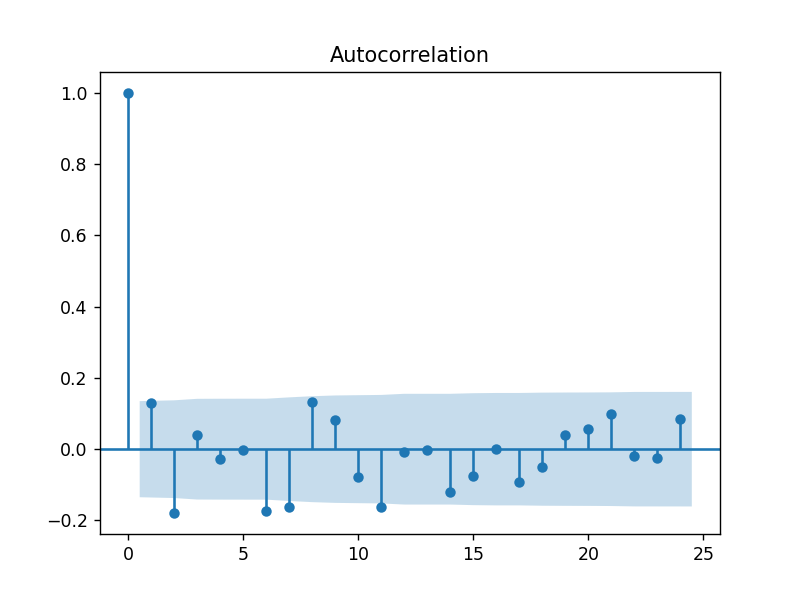

<IPython.core.display.Javascript object>


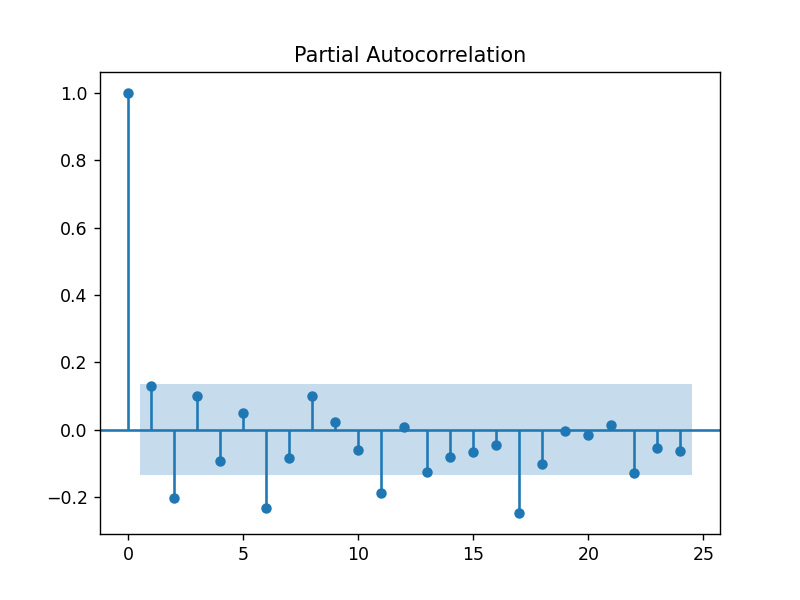

In [49]:
aclnf = plot_acf(endog)
pacfjnwejf = plot_pacf(endog)

In [51]:
model = ARIMA(endog, order=(2, 0, 8), enforce_invertibility=False)
res = model.fit_constrained({'ma.L1' :0, 
                             'ma.L2' :0, 
                             'ma.L4' :0, 
                             'ma.L5' :0, 
                             'ma.L6' :0, 
                             'ma.L7' :0, 
                            })
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 spread   No. Observations:                  211
Model:                 ARIMA(2, 0, 8)   Log Likelihood                -144.572
Date:                Sat, 26 Mar 2022   AIC                            301.144
Time:                        16:50:14   BIC                            321.255
Sample:                             0   HQIC                           309.274
                                - 211                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0008      0.054      0.015      0.988      -0.104       0.106
ar.L1             0.2410      0.058      4.136      0.000       0.127       0.355
ar.L2            -0.2329      0.064     

### Question 3

<IPython.core.display.Javascript object>


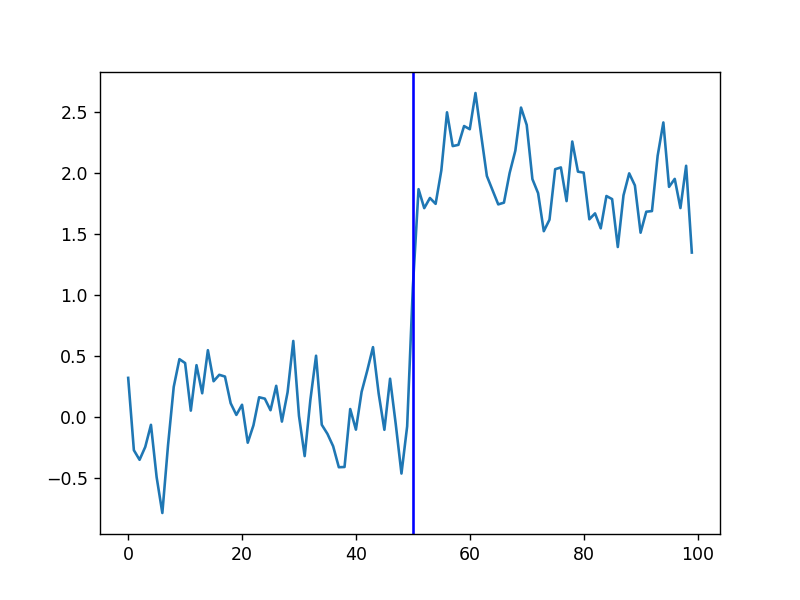

In [118]:
plt.figure()
break_df = pd.read_excel('break.xls')
exog = break_df['Y1']
break_df['Y1'].plot()
del_exog = exog - exog.diff()
break_df['lagY1'] = break_df['Y1'].shift()
break_df['delY1'] = break_df['Y1'].diff()
break_df
plt.axvline(x = 50, color = 'b', label = 'axvline - full height')

In [93]:
break_df.columns

Index(['EPSILON', 'Y1', 'Y2', 'lagY1', 'delY1'], dtype='object')

In [94]:
endog = break_df['Y1']
acf_nums4 = acf(endog)
for x in range(7):
    print('\u03C1{}: {}'.format(get_sub(str(x+1)), acf_nums4[x+1]))

ρ₁: 0.9421274868292613
ρ₂: 0.8775311761056256
ρ₃: 0.835511238594909
ρ₄: 0.8053577386671814
ρ₅: 0.7677767787707693
ρ₆: 0.7238774378846644
ρ₇: 0.6853015198855175


C:\Users\parik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\parik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [95]:
endog = break_df['delY1'][1:]
acf_nums5 = acf(endog)
for x in range(7):
    print('\u03C1{}: {}'.format(get_sub(str(x+1)), acf_nums5[x+1]))

ρ₁: -0.0016951063073623786
ρ₂: -0.20100848089656356
ρ₃: -0.11169854166929602
ρ₄: 0.07920640666652913
ρ₅: 0.010289896659276949
ρ₆: -0.060486911569326174
ρ₇: -0.06709844769582625


In [96]:
res = OLS(break_df['delY1'][1:],break_df['lagY1'][1:]).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  delY1   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.9701
Date:                Sat, 26 Mar 2022   Prob (F-statistic):                       0.327
Time:                        18:06:06   Log-Likelihood:                         -30.044
No. Observations:                  99   AIC:                                      62.09
Df Residuals:                      98   BIC:                                      64.68
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [97]:
trend = range(len(break_df))
break_df['trend'] = trend

In [98]:
res = OLS(break_df['delY1'][1:],add_constant(break_df['lagY1'][1:])).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  delY1   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.911
Date:                Sat, 26 Mar 2022   Prob (F-statistic):             0.0912
Time:                        18:06:07   Log-Likelihood:                -29.018
No. Observations:                  99   AIC:                             62.04
Df Residuals:                      97   BIC:                             67.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0661      0.046      1.425      0.1

In [99]:
res = OLS(break_df['delY1'][1:],add_constant(break_df[['lagY1','trend']][1:])).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  delY1   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     3.752
Date:                Sat, 26 Mar 2022   Prob (F-statistic):             0.0270
Time:                        18:06:07   Log-Likelihood:                -26.757
No. Observations:                  99   AIC:                             59.51
Df Residuals:                      96   BIC:                             67.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0447      0.069     -0.644      0.5

### Q3. c

<IPython.core.display.Javascript object>


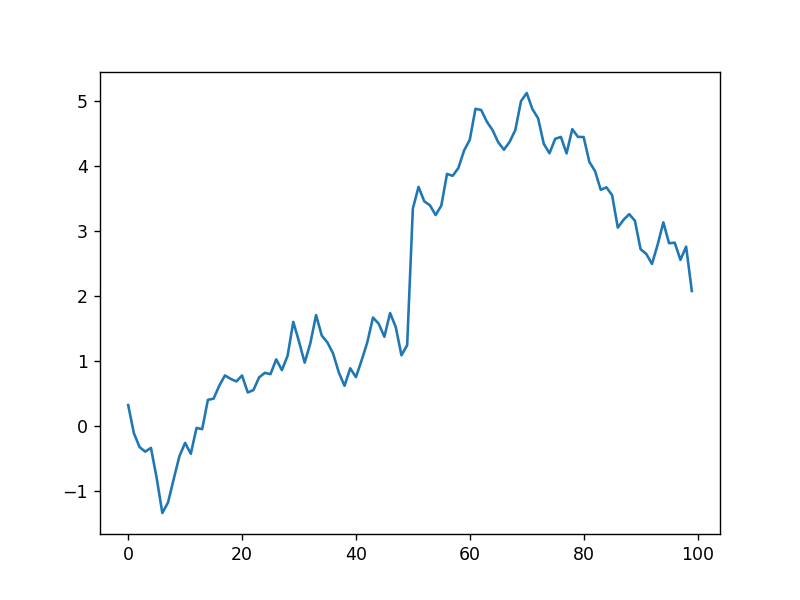

<AxesSubplot:>

In [120]:
plt.figure()
endog = break_df['Y2']
endog.plot()

### Q3.d

In [101]:
diffendog = endog.diff()[1:]

<IPython.core.display.Javascript object>


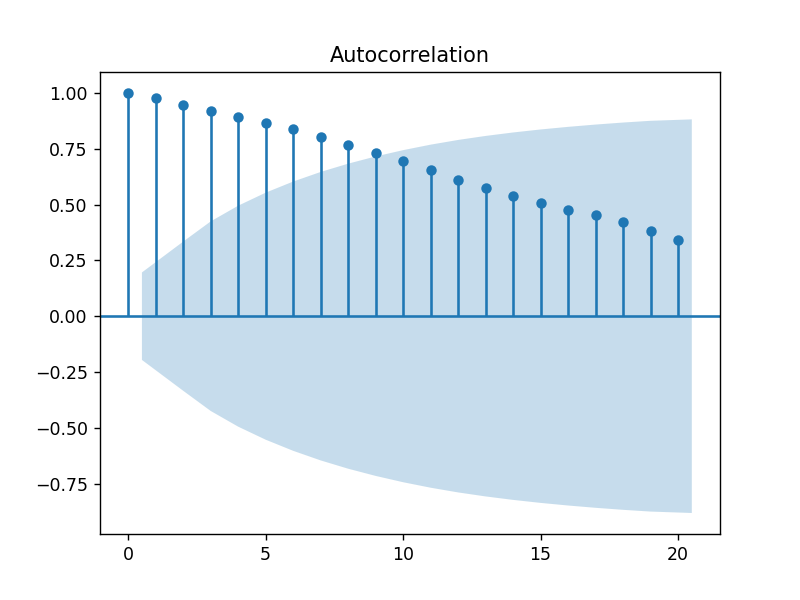

<IPython.core.display.Javascript object>


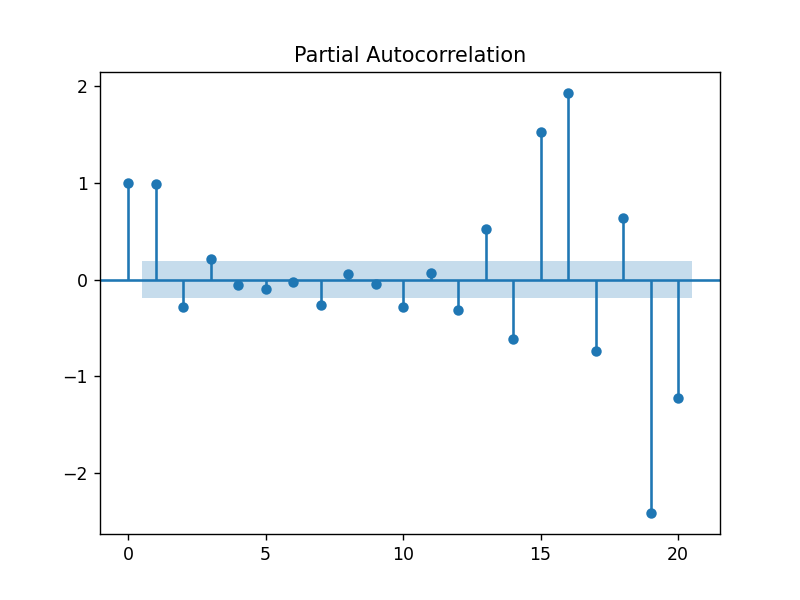

C:\Users\parik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


In [102]:
ksfjek = plot_acf(endog)
kesjf = plot_pacf(endog)

<IPython.core.display.Javascript object>


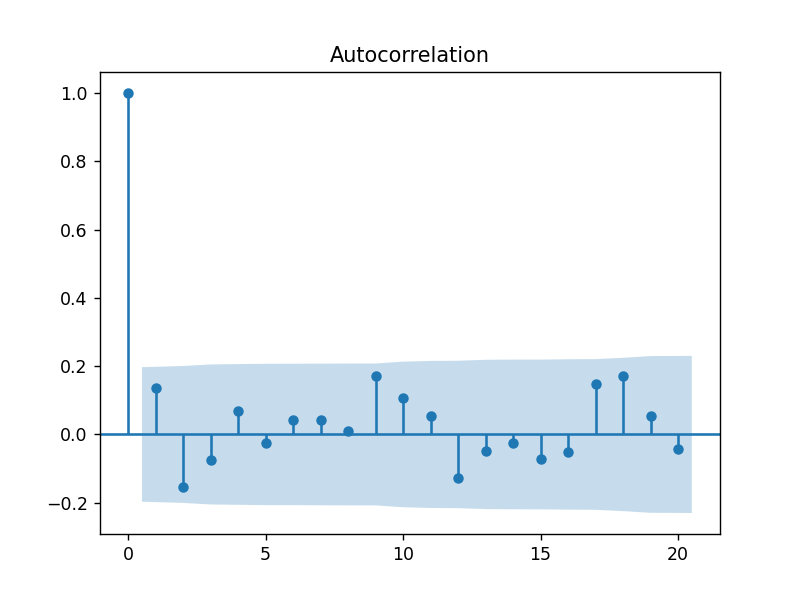

<IPython.core.display.Javascript object>


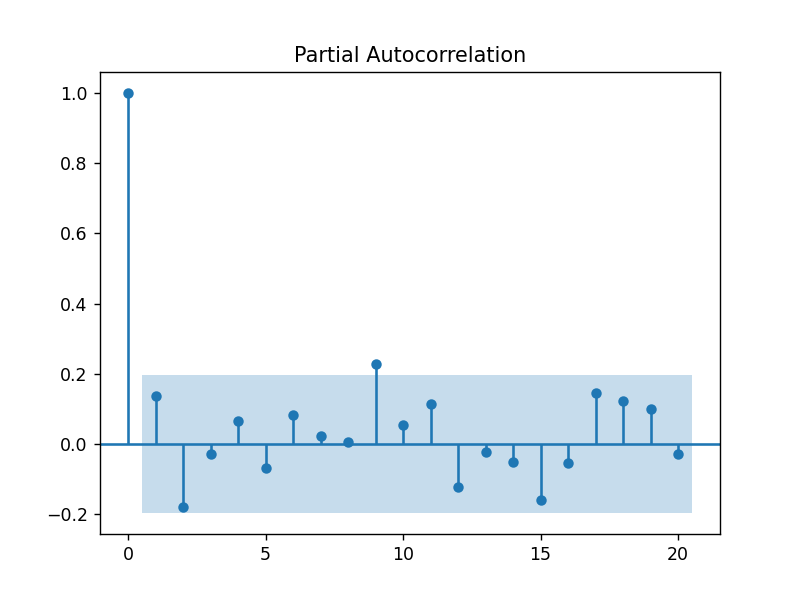

In [104]:
fje = plot_acf(diffendog)
nfisubei = plot_pacf(diffendog)

### Q3.e

In [105]:
trend = range(len(break_df))
break_df['trend'] = trend

In [106]:
lagendog = endog.shift()

In [107]:
break_df['lagY2'] = break_df['Y2'].shift()
break_df['diffY2'] = break_df.Y2.diff()

In [108]:
endog = break_df['diffY2'][1:]
exog = break_df.loc[1:,['trend','lagY2']]

In [109]:
res = OLS(endog,add_constant(exog)).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 diffY2   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7635
Date:                Sat, 26 Mar 2022   Prob (F-statistic):              0.469
Time:                        18:06:10   Log-Likelihood:                -32.384
No. Observations:                  99   AIC:                             70.77
Df Residuals:                      96   BIC:                             78.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0723      0.070      1.032      0.3

In [110]:
break_df['dl'] = 0
break_df.dl.loc[50:] = 1

C:\Users\parik\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Q3. f

In [111]:
res = OLS(break_df['Y2'],sm.add_constant(break_df[['trend','dl']])).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     213.7
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           2.87e-36
Time:                        18:06:11   Log-Likelihood:                -114.77
No. Observations:                 100   AIC:                             235.5
Df Residuals:                      97   BIC:                             243.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4263      0.171      2.492      0.0

In [112]:
residuals = res.resid
print("{0:.4f}".format(residuals.mean()))

0.0000


In [113]:
result = sm.tsa.stattools.adfuller(residuals)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.913619
p-value: 0.783455
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


In [114]:
result = scipy.stats.ttest_1samp(residuals, 0, axis=0, nan_policy='propagate', alternative='two-sided')
print("pvalues: {0:.2f}".format(result.pvalue))

pvalues: 1.00


In [115]:
res = OLS(break_df['Y2'],sm.add_constant(break_df['dl'])).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     420.8
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           3.05e-37
Time:                        18:06:12   Log-Likelihood:                -115.82
No. Observations:                 100   AIC:                             235.6
Df Residuals:                      98   BIC:                             240.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6143      0.110      5.581      0.0